## Import Packages


In [196]:
import numpy as np   
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import silhouette_score # to find silhouette score
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage #for hierarchial clustering
from scipy.spatial.distance import pdist
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import dataset

In [197]:
creditdata=pd.read_csv("Credit Card Customer Data.csv") #import dataset 

## EDA

In [198]:
creditdata.head() #display first five rows

# it shows no decimal values

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [199]:
creditdata.info() # further analysis on data to understanda datatypes

# all are in int values and there is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [200]:
creditdata.describe()

# EDA on the data showing std , mean , min ,max , count and quantiles for all columns

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [201]:
creditdata.dtypes # shows datatype of all columns

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [202]:
creditdata.shape # no of rows and columns 

(660, 7)

In [203]:
creditdata.isna().sum() # check if there is any null value

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## Univariate Analysis

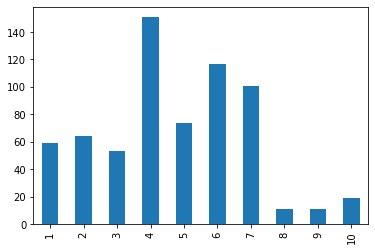

In [204]:
creditdata['Total_Credit_Cards'].value_counts().sort_index().plot.bar() 

# Bar plot shows no of customers who has 4 credit cards are more in number and 6 credit cards being the second large base of customers
# No of customers who has 8 and 9 cards are in the same range

[]

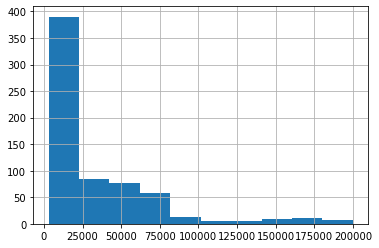

In [205]:
creditdata['Avg_Credit_Limit'].hist()  # average credto limit seems to be positively skewed
plt.plot()

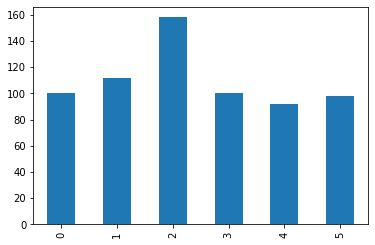

In [206]:
creditdata['Total_visits_bank'].value_counts().sort_index().plot.bar() # Bar plot shows mostly customers have visited bank twice

# Rest of the data has very slight variation

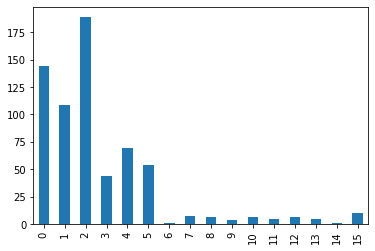

In [207]:
creditdata['Total_visits_online'].value_counts().sort_index().plot.bar()

# Same like bank visit , visits online also has 2 visits as largest , 0 visits as second largest base and there is no uniform spread on rest of the data


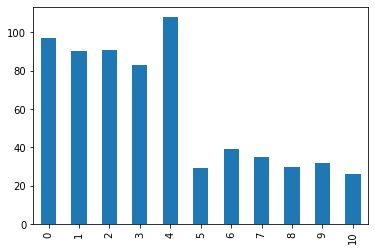

In [208]:
creditdata['Total_calls_made'].value_counts().sort_index().plot.bar() # Bar plot shows total calls made has number 4 as largest and 5 being the smallest no of calls

In [209]:
creditdata['Sl_No'].value_counts() # Data shows this column stands unique , hence doesnt bring more value for the clustering

660    1
226    1
224    1
223    1
222    1
      ..
440    1
439    1
438    1
437    1
1      1
Name: Sl_No, Length: 660, dtype: int64

In [210]:
creditdata['Customer Key'].value_counts()# Data shows this column stands unique , hence doesnt bring more value for the clustering

47437    2
37252    2
97935    2
96929    2
50706    2
        ..
66706    1
72339    1
69965    1
85645    1
71681    1
Name: Customer Key, Length: 655, dtype: int64

In [211]:
creditdata=creditdata.drop(['Customer Key','Sl_No'],axis=1) # Removing customer key and Sl.No columns

In [212]:
creditdata # dataset after removing the columns 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


## Bivariate Analysis

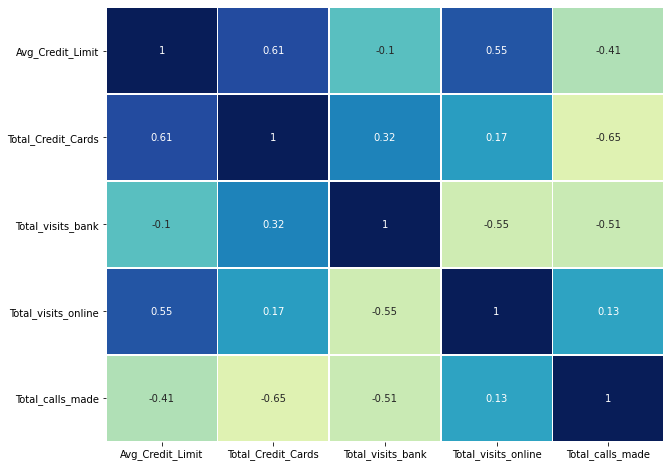

In [213]:
plt.figure(figsize=(10,8))
sns.heatmap(creditdata.corr(),
            annot=True,
            linewidths=.7,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

Avg credit limit has a +ve correlation with total credit cards and total visits online
Total credit cards has a +ve correlation with total visits bank and total visits online and avg credit limit

shows people who visits online has more avg credit limit and manhy credit cards

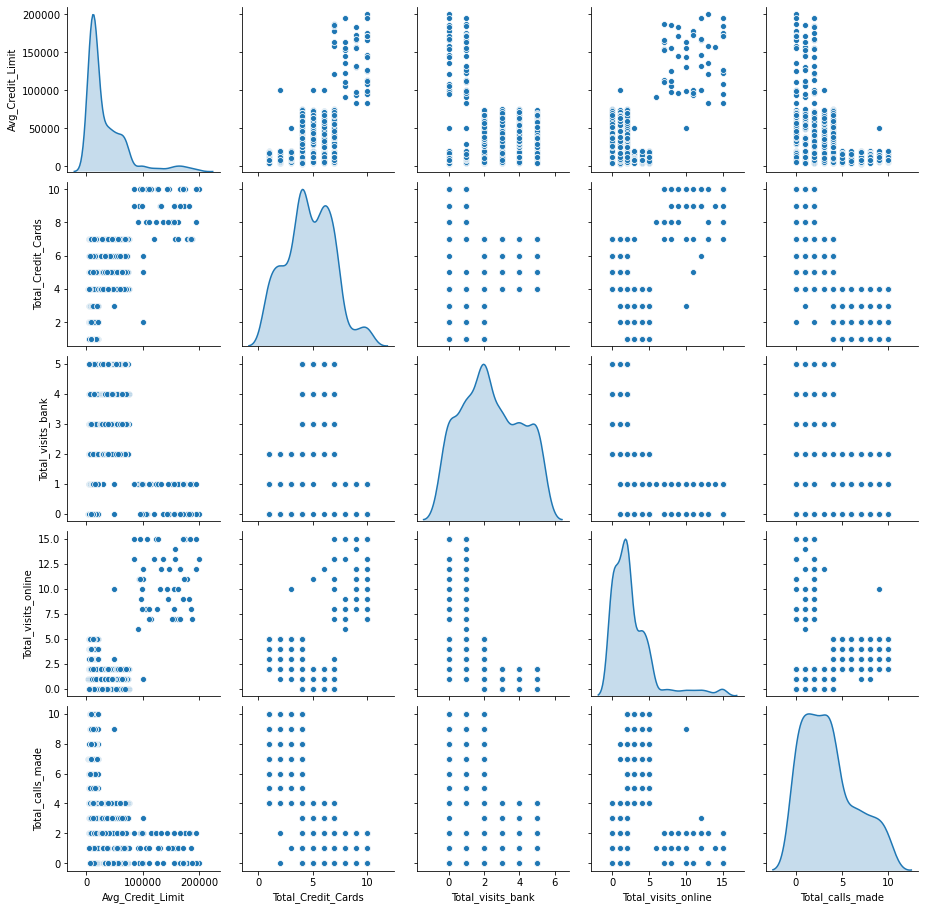

In [214]:
sns.pairplot(creditdata, palette="husl",diag_kind='kde') # the data shows on an average there can be 3 or 4 clusters

{'whiskers': [<matplotlib.lines.Line2D at 0x1e15bf16910>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15bef9d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15beeedc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15bf0b970>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15bf0b190>],
 'means': []}

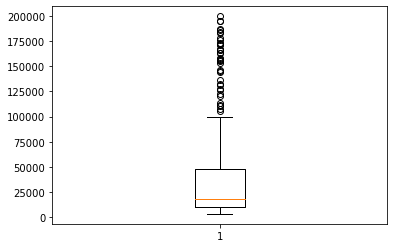

In [215]:
plt.boxplot(creditdata['Avg_Credit_Limit']) # there are outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e15c2d64c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15c2d6b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15c2d6130>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15c2e0280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15c2e0550>],
 'means': []}

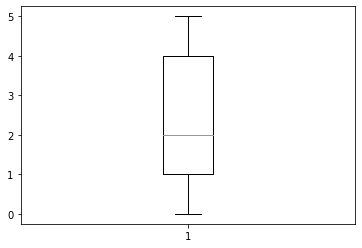

In [216]:
plt.boxplot(creditdata['Total_visits_bank']) # no outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1e15c323d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15c331490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15c323a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15c331b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15c331e50>],
 'means': []}

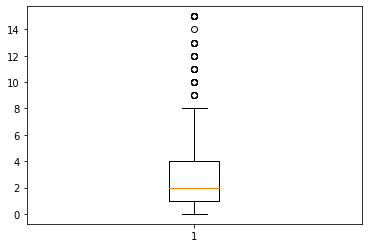

In [217]:
plt.boxplot(creditdata['Total_visits_online']) # there are outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1e15c387070>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15c387760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15c37acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15c387e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15c394160>],
 'means': []}

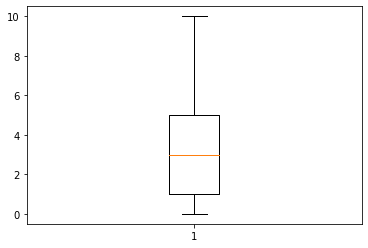

In [218]:
plt.boxplot(creditdata['Total_calls_made']) # no outlier

In [219]:
creditdata 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


In [220]:
Q1 = creditdata.quantile(0.25)   # Using IQR method to remove outliers
Q3 = creditdata.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Avg_Credit_Limit       38000.0
Total_Credit_Cards         3.0
Total_visits_bank          3.0
Total_visits_online        3.0
Total_calls_made           4.0
dtype: float64


In [221]:
np.where((creditdata < (Q1 - 1.5 * IQR)) | (creditdata > (Q3 + 1.5 * IQR))) # range of outliers

(array([  1,   4,   6, 612, 612, 613, 614, 615, 615, 616, 617, 617, 618,
        618, 619, 619, 620, 620, 621, 621, 622, 622, 623, 624, 624, 626,
        626, 627, 627, 628, 629, 630, 630, 631, 631, 632, 633, 633, 634,
        635, 636, 637, 637, 638, 639, 639, 640, 640, 641, 641, 642, 644,
        644, 645, 645, 646, 647, 647, 648, 649, 650, 650, 651, 651, 652,
        653, 654, 654, 655, 656, 657, 657, 658, 658, 659, 659], dtype=int64),
 array([3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0,
        0, 3, 0, 3, 0, 3, 3, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3,
        0, 3, 3, 3, 0, 3, 0, 3, 0, 3], dtype=int64))

In [222]:
creditdata_out = creditdata[~((creditdata < (Q1 - 1.5 * IQR)) |(creditdata > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
creditdata_out.shape   

(611, 5)

In [223]:
creditdata4 = creditdata.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(creditdata4 < Q1 - 1.5 * IQR)[0], np.where(creditdata4 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    creditdata4.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(creditdata4 > Q3 + 1.5 * IQR)[0], np.where(creditdata4 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    creditdata4.iloc[i,j] = whisker[j]

In [224]:
creditdata4.shape

(660, 5)

In [225]:
np.where((creditdata4 < (Q1 - 1.5 * IQR)) | (creditdata4 > (Q3 + 1.5 * IQR))) # no outlier found

(array([], dtype=int64), array([], dtype=int64))

In [226]:
creditdata4

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000.0,2,1,1.0,0
1,50000.0,3,0,8.5,9
2,50000.0,7,1,3.0,4
3,30000.0,5,1,1.0,4
4,100000.0,6,0,8.5,3
...,...,...,...,...,...
655,99000.0,10,1,8.5,0
656,84000.0,10,1,8.5,2
657,105000.0,8,1,8.5,1
658,105000.0,10,1,8.5,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1e15c3e1b20>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15c3ec250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15c3e17c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15c3ec910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15c3ecbe0>],
 'means': []}

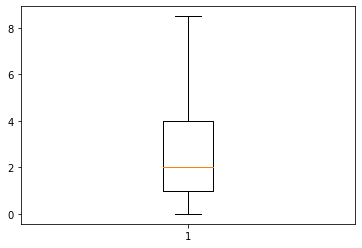

In [227]:
plt.boxplot(creditdata4['Total_visits_online']) # no outlier

{'whiskers': [<matplotlib.lines.Line2D at 0x1e15c42cf70>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15c43a670>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15c42cc10>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15c43ad60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15c4430a0>],
 'means': []}

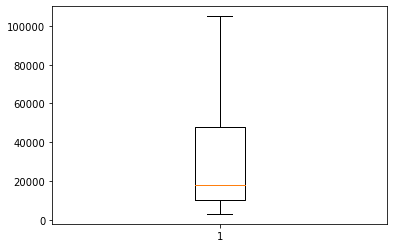

In [228]:
plt.boxplot(creditdata4['Avg_Credit_Limit']) # no outlier

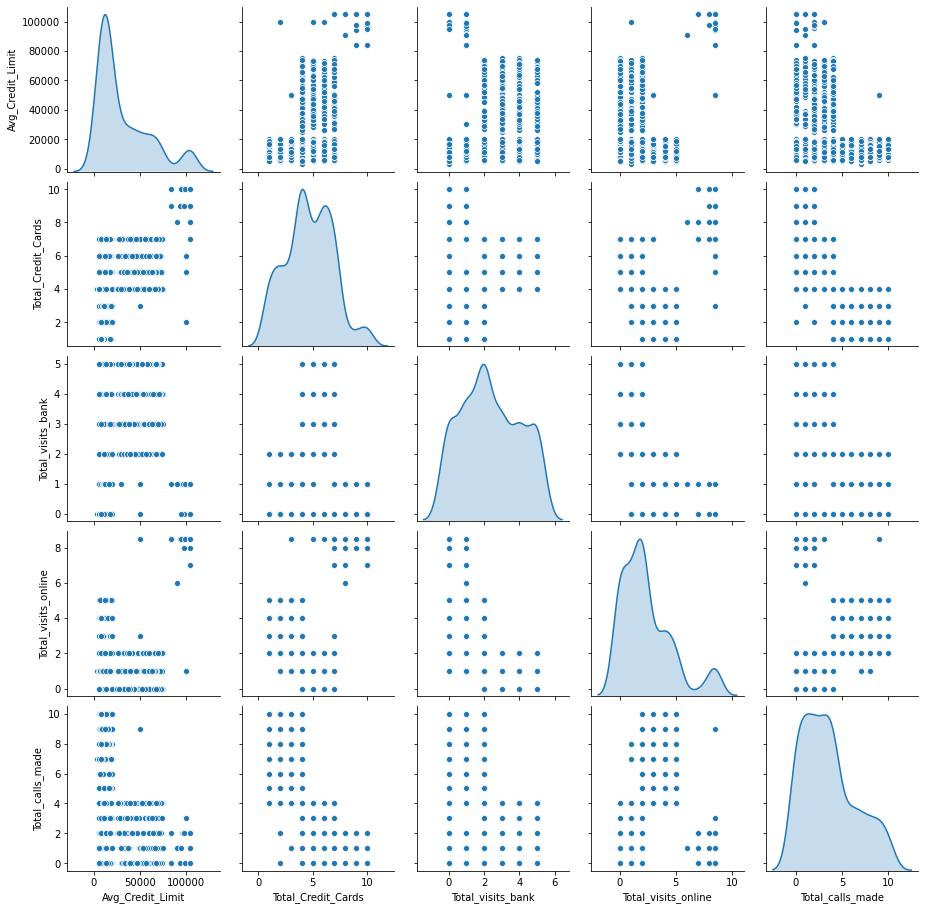

In [229]:
sns.pairplot(creditdata4,diag_kind='kde') # it shows 3 or 4 clusters at the max 

In [230]:
creditdata4.dtypes # needs to scale data after outlier treatment there are float integers found in the columns

Avg_Credit_Limit       float64
Total_Credit_Cards       int64
Total_visits_bank        int64
Total_visits_online    float64
Total_calls_made         int64
dtype: object

In [231]:
numeric_cols = creditdata4.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
creditdata4[numeric_cols] =creditdata4[numeric_cols].apply(zscore)

In [232]:
creditdata4.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

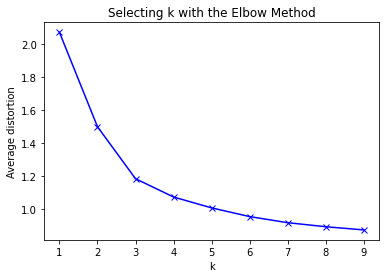

In [235]:
# Finding optimal no of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(creditdata4)
    prediction=model.predict(creditdata4)
    meanDistortions.append(sum(np.min(cdist(creditdata4, model.cluster_centers_, 'euclidean'), axis=1)) / creditdata4.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

There are no clear bends , but there is a bend at 3 and slight bend at 4 

In [239]:
# Let us first start with K = 3
final_model1=KMeans(3)
final_model1.fit(creditdata4)
prediction1=final_model1.predict(creditdata4)

#Append the prediction 
creditdata4["GROUP"] = prediction1
print("Groups Assigned : \n")
creditdata4.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,1
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,2
2,0.643619,1.058973,-0.860451,0.267054,0.145528,1
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,1
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,0


In [240]:
creditdataClust = creditdata4.groupby(['GROUP'])   # grouping dataset by group
creditdataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,2.492325,1.862226,-1.105763,2.563922,-0.874330
1,0.074275,0.373690,0.666395,-0.627808,-0.553005
2,-0.684315,-1.059623,-0.901518,0.509544,1.148109


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E15D3E6EB0>,
      dtype=object)

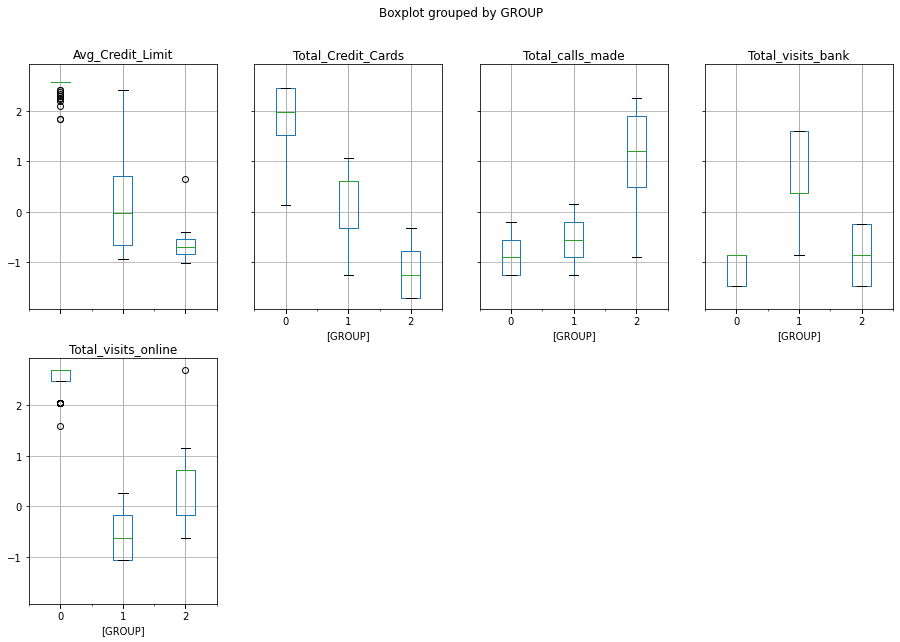

In [241]:
creditdata4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

With K = 3 clustering - 3 clusters of data in visualisation above

Cluster 1 has more customers with avg credit limit , total credit cards and total visits online

Cluster 3 has more customers who made more calls , even if no of calls made are more , avg credit limit and no of credit cards remain less

Cluster 2 has more customers who visits bank more and stands in between cluster 1 and 2 for all other data





In [242]:
# Let us first start with K = 4
final_model2=KMeans(4)
final_model2.fit(creditdata4)
prediction2=final_model2.predict(creditdata4)

#Append the prediction 
creditdata4["GROUP"] = prediction2
print("Groups Assigned : \n")
creditdata4.head()

Groups Assigned : 



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,3
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,3
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,3
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,2


In [243]:
creditdataClust = creditdata4.groupby(['GROUP'])
creditdataClust.mean() 


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,
0,-0.502876,0.368593,0.805351,-0.613775,-0.576604
1,-0.684315,-1.059623,-0.901518,0.509544,1.148109
2,2.492325,1.862226,-1.105763,2.563922,-0.874330
3,0.855542,0.380588,0.478295,-0.646805,-0.521060


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E15F0731F0>,
      dtype=object)

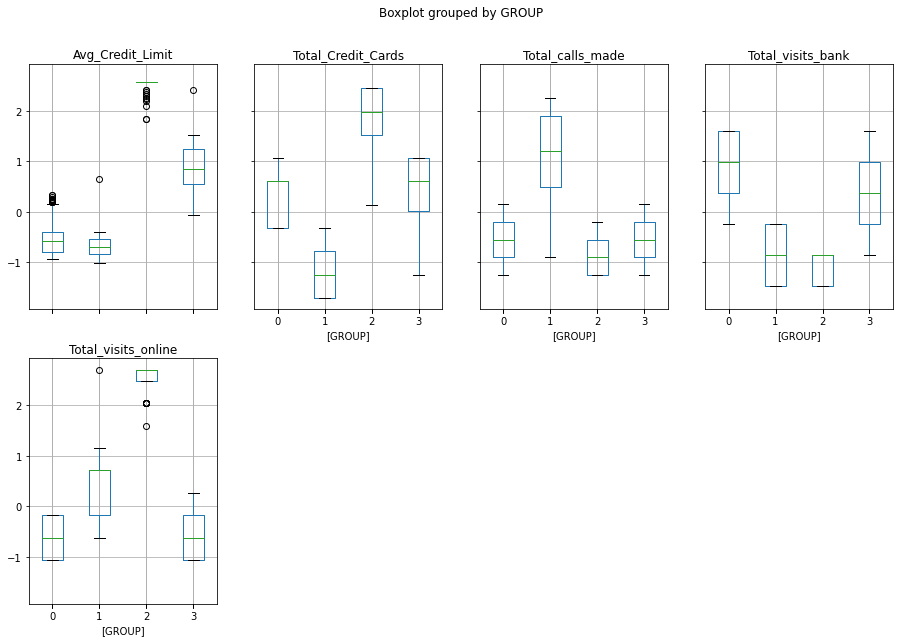

In [244]:
creditdata4.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

With K=4 clustering same as K=3

Cluster 3 has more avg credit limit , more credit cards owning customer and more visits online

Cluster 1 targets on more customers who visits bank more

Cluster 2 has more customers who made more calls but no of credit cards and avg credit limit seems less 

In [245]:
creditdata5=creditdata4.drop(['GROUP'],axis=1) # dropping group column to reuse data for hierarchial clustering

In [246]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(creditdata5, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(creditdata5))

c # here data is 0.77 not much better 

0.7702265240776373

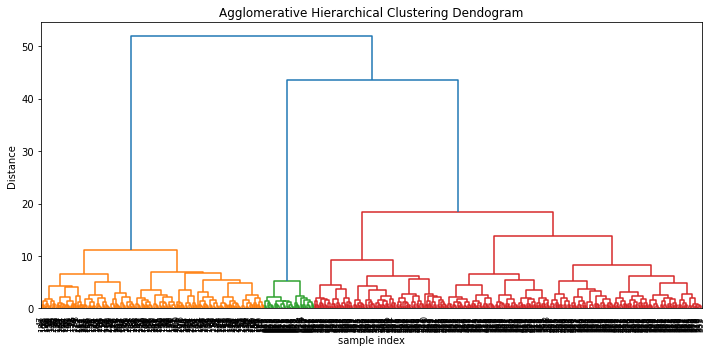

In [247]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

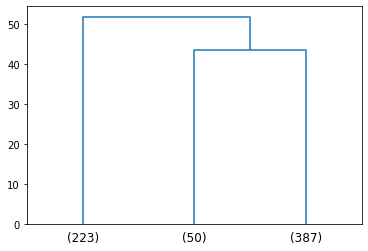

In [248]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [249]:
Z.shape

(659, 4)

In [250]:
max_d=40

In [251]:
clusters = fcluster(Z, max_d, criterion='distance') # Cluster data into 3 different groups
clusters

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [252]:
wardcluster=creditdata5.copy()
wardcluster['Cluster']=clusters
wardcluster

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,3
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,3
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,3
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,2
...,...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.705813,-1.251537,2
656,1.837238,2.443892,-0.860451,2.705813,-0.553005,2
657,2.574474,1.520613,-0.860451,2.705813,-0.902271,2
658,2.574474,2.443892,-0.860451,2.705813,-1.251537,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E15D4ABF70>,
      dtype=object)

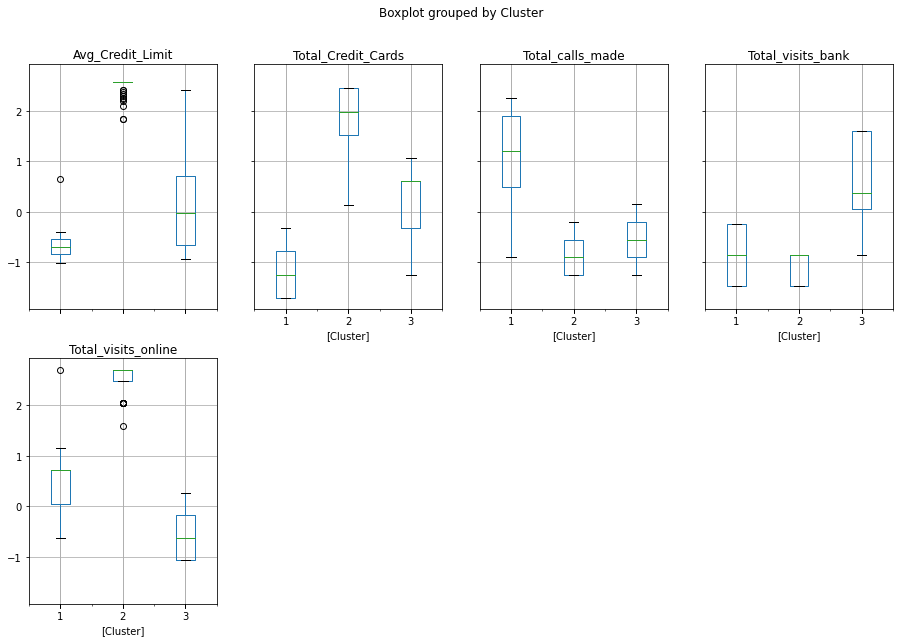

In [253]:
wardcluster.boxplot(by='Cluster', layout = (2,4),figsize=(15,10)) #visualise clusters using boxplot

Cluster 1 has customer data who makes more calls to bank and has less avg credit limit and less no of credit cards

Cluster 2 has more visits online and has more avg credit limit and more credit cards

Cluster 3 has more visits to bank and remaining data is moderate

In [254]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z1 = linkage(creditdata5, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z1 , pdist(creditdata5))

c

0.8207884321476555

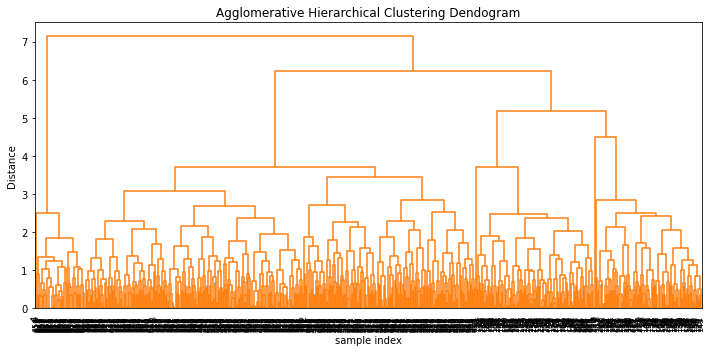

In [255]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

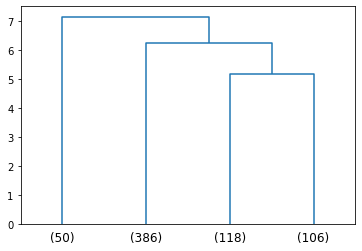

In [256]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z1,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

In [264]:
max_d=40

In [265]:
clusters1 = fcluster(Z, max_d, criterion='distance')
clusters1

array([3, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [266]:
completecluster=creditdata5.copy()
completecluster['Cluster']=clusters1
completecluster

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537,3
1,0.643619,-0.787585,-1.473731,2.705813,1.891859,1
2,0.643619,1.058973,-0.860451,0.267054,0.145528,3
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528,3
4,2.398942,0.597334,-1.473731,2.705813,-0.203739,2
...,...,...,...,...,...,...
655,2.363835,2.443892,-0.860451,2.705813,-1.251537,2
656,1.837238,2.443892,-0.860451,2.705813,-0.553005,2
657,2.574474,1.520613,-0.860451,2.705813,-0.902271,2
658,2.574474,2.443892,-0.860451,2.705813,-1.251537,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E163621100>,
      dtype=object)

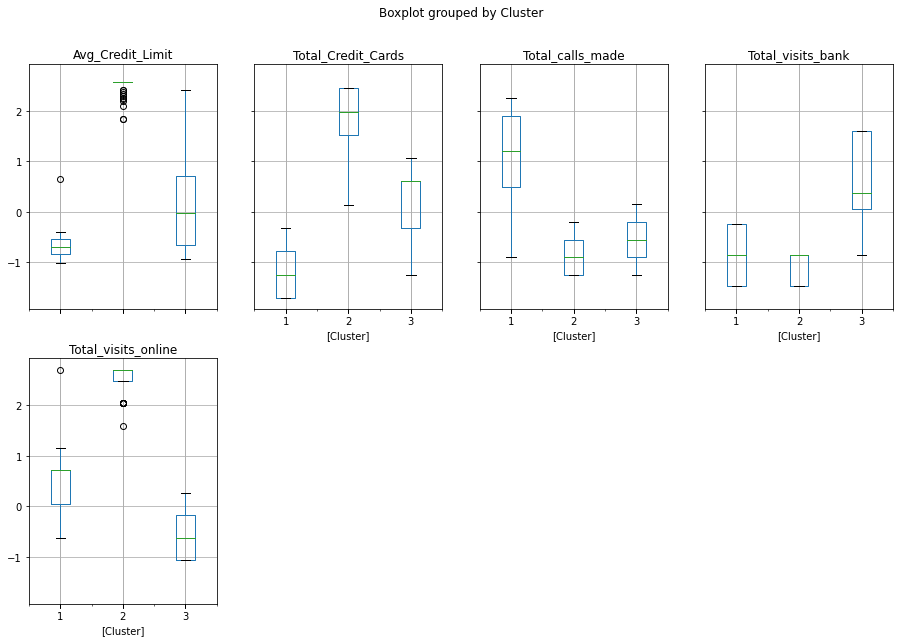

In [267]:
completecluster.boxplot(by='Cluster', layout = (2,4),figsize=(15,10))

Cluster 1 has customer data who makes more calls to bank and has less avg credit limit and less no of credit cards

Cluster 2 has more visits online and has more avg credit limit and more credit cards

Cluster 3 has more visits to bank and remaining data is moderate

In [261]:
print("Silhouette score - K-means - cluster=3 :",silhouette_score(creditdata4,prediction1))
print("Silhouette score - K-means - cluster=4 :",silhouette_score(creditdata4,prediction2))
print("Silhouette score - Hierarchial - ward :",silhouette_score(wardcluster,clusters))
print("Silhouette score - Hierarchial - complete :",silhouette_score(completecluster,clusters1))


Silhouette score - K-means - cluster=3 : 0.4330517944473205
Silhouette score - K-means - cluster=4 : 0.5712745566795634
Silhouette score - Hierarchial - ward : 0.5858606847480553
Silhouette score - Hierarchial - complete : 0.4080746655121548


Silhouette score of all clustering methods lies between 0 and 1 showing a dense cluster and each cluster is a way different from others but still its not very near to 1 

Comparing the clusters obtained from different linkages / Kmeans clusters

Three cluster formation seems to be a good clustering 

Cluster 1 - customer who visits online more

CLuster 2 - customer who goes to bank more 

Cluster 3 - customer who calls bank more

These can be the 3 different segments of customer



## How many different segments of customers are there? 

    Three segments 
    
## How are these segments different from each other? 
    
     Cluster information as below
     
         Cluster 1 - customer who visits online more than bank / calls
         CLuster 2 - customer who goes to bank more than calls / online
         Cluster 3 - customer who calls  more than bank / online
     
    Customer who uses online more has more avg credit limit and more credit cards

    Customer who visits bank more has medium range of avg credit limit and medium no of cards 

    Customer who calls bank more has lesser avg credit limit and less no of cards than the other two

## What are your recommendations to the bank on how to better market to and service these customers? 

     
     Customer who calls bank has less number of credit cards and less avg credit limit - To increase the customer base , there can be any promotions before the start of all the calls like an IVR to explain the benefits of credit card
     
     Customer who already has a credit card and calls bank can be given an option to do online banking for ease (or) option to select another credit card for more benefits
     
     Customer who visits online has a good base already but for maintaining this , bank should keep promoting about credit cards in the online bank websites.These customers can be given some merchandise offers to be retained


    Customer who visits bank often should be explained in person about the benefits of internet banking and can be given pamplets whenever they visit bank on details on benefits of credit card 
